### <p align='center'><u><b> Momentos de inercia </b></u></p>

<p align='center'><u><b> Caso 2-D </b></u></p>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Lectura del csv
url = 'datosmasas.csv'
df = pd.read_csv(url)
df.head()

,particula,masas,x,y,z
0,1,2.0,-53.0,79.0,-91.0
1,2,2.0,13.0,-142.0,-177.0
2,3,2.0,-109.0,-103.0,-120.0
3,4,2.0,4.0,-96.0,110.0
4,5,4.0,222.0,-22.0,-236.0


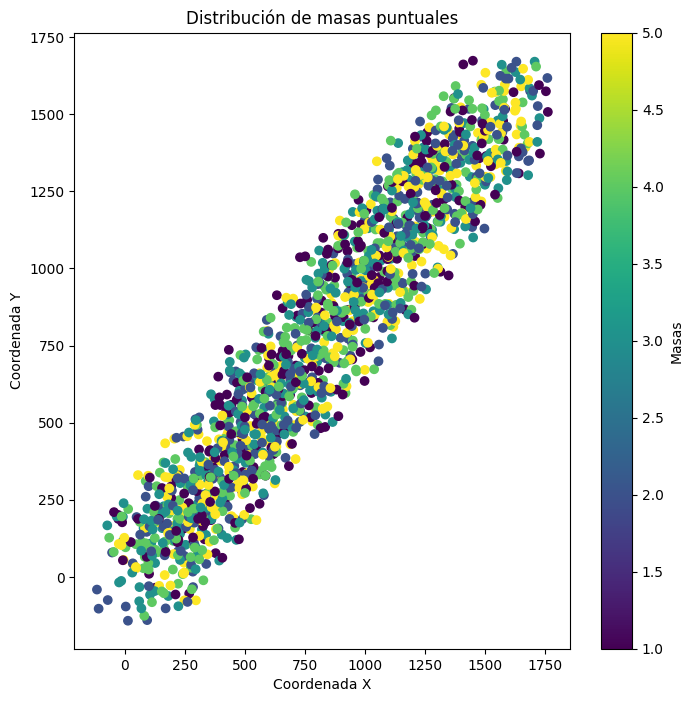

In [4]:
plt.figure(figsize=(8,8))
plt.scatter(data=df, x='x', y='y', c='masas', cmap='viridis')
plt.title('Distribución de masas puntuales')
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')
plt.colorbar(label='Masas')
plt.grid(False)
plt.show()

Considerando el caso 2-D, el tensor de inercia de orden cero para nuestra distribución de masas es:

$$
\eta _0 = \sum_{i=1}^N v_i 
$$

que corresponde simplemente con la masa total del sistema

In [5]:
eta0 = df['masas'].sum()
print(f'El tensor de inercia de orden cero es: ', eta0)

El tensor de inercia de orden cero es:  4627.0


El tensor de inercia de orden 1 está definido por:

$$
\eta _1 = \sum_{i=1}^N m_i (|x_i \rangle - |\overline{x} \rangle)
$$
con
$$
|\overline{x} \rangle = \frac{1}{\sum_{i=1}^N m_i} \left( \sum_{i=1}^N m_i |x_i \rangle \right)
$$
El tensor de inercia de orden 1 describe la medida de desplazamiento promedio respecto a la media.


In [6]:
xmed = (df['masas'] * df['x']).sum() / df['masas'].sum()
ymed = (df['masas'] * df['y']).sum() / df['masas'].sum()

eta1x = (df['masas'] * (df['x'] - xmed)).sum()
eta1y = (df['masas'] * (df['y'] - ymed)).sum()

eta1 = np.round(np.array([eta1x, eta1y]), 10)

print(f'El tensor de inercia de orden uno es: ', eta1) # prácticamente (0,0)

El tensor de inercia de orden uno es:  [1.e-10 0.e+00]


Finalmente, el tensor de inercia de orden 2 esta dado por:

$$
\eta _2 = \sum_{i=1}^N m_i (|x_i \rangle - |\overline{x}_i \rangle)^2
$$

Para este caso, el tensor corresponde a una matriz $2 \times 2$ de la forma:

$$
\left( 
    \begin{matrix} 
    I_{xx} & I_{xy} \\ 
    I_{yx} & I_{yy} 
    \end{matrix} 
\right)

=

\left( 
    \begin{matrix} 
    \sum_{i=1}^N m_i (|x \rangle - |\overline{x}\rangle)_i^2 & \sum_{i=1}^N m_i (|x \rangle - |\overline{x}\rangle)_i (|y \rangle - |\overline{y}\rangle)_i \\ 
    \sum_{i=1}^N m_i (|y \rangle - |\overline{y}\rangle)_i (|x \rangle - |\overline{x}\rangle)_i  & \sum_{i=1}^N m_i (|y \rangle - |\overline{y}\rangle)_i^2 
    \end{matrix} 
\right)
$$

que finalmente es la matriz de covarianza del sistema


In [7]:
Ixx = (df['masas'] * (df['x'] - xmed) * (df['x'] - xmed)).sum()
Ixy = (df['masas'] * (df['x'] - xmed) * (df['y'] - ymed)).sum()
Iyy = (df['masas'] * (df['y'] - ymed) * (df['y'] - ymed)).sum()

eta2 = np.array(([Ixx, Ixy],
                 [Ixy, Iyy]))

autval, autvec = np.linalg.eig(eta2)

autvec1 = np.array([autvec[0,0], autvec[0,1]]) # Primer autovector
autvec2 = np.array([autvec[1,0], autvec[1,1]]) # Segundo autovector
rcm = np.array([xmed, ymed]) # Posición del centro de masa
xc = np.array([1,0]) # Vector unitario x
yc = np.array([0,1]) # Vector unitario y
origen = np.array([0,0])

print(f'El tensor de inercia de segundo orden o la matriz de covarianza es:')
print(eta2)

'''
Vemos que las componentes Ixx, Ixy e Iyy no varían mucho en magnitud, por lo que se puede concluir que la distribución de masa es tiene una forma 
simétrica, lo que se puede observar en la gráfica.
'''

El tensor de inercia de segundo orden o la matriz de covarianza es:
[[9.58535589e+08 9.11747911e+08]
 [9.11747911e+08 9.63660148e+08]]


'\nVemos que las componentes Ixx, Ixy e Iyy no varían mucho en magnitud, por lo que se puede concluir que la distribución de masa es tiene una forma \nsimétrica, lo que se puede observar en la gráfica.\n'

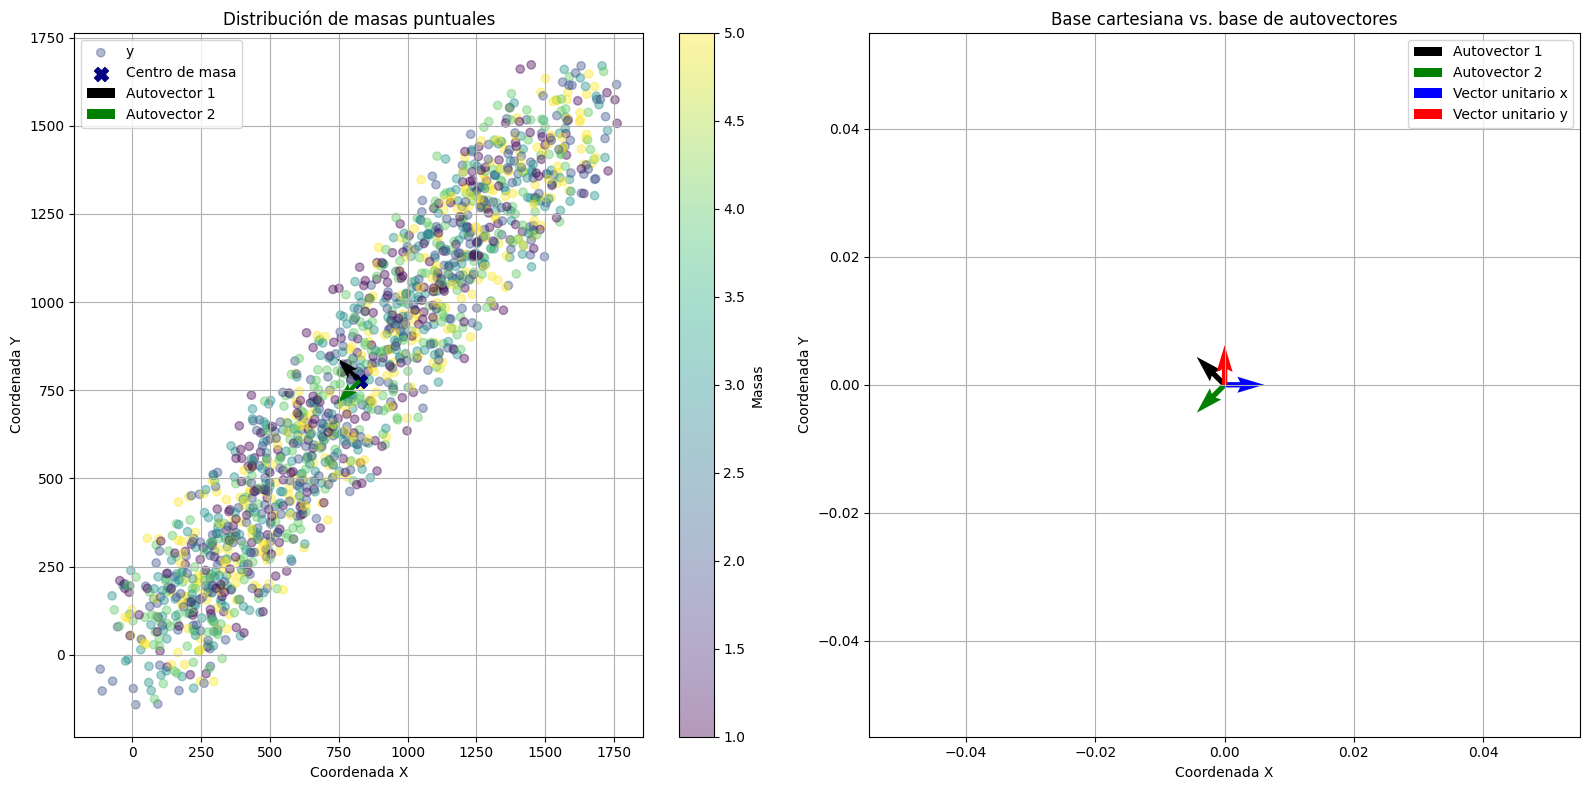

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sc = axes[0].scatter(data=df, x='x', y='y', c='masas', cmap='viridis', alpha=0.4)
axes[0].scatter(*rcm, c='navy', s=100, marker='X', label='Centro de masa')
axes[0].quiver(*rcm, *(autvec[:, 0] * autval[0]), color='k', label='Autovector 1')
axes[0].quiver(*rcm, *(autvec[:, 1] * autval[1]), color='g', label='Autovector 2')
axes[0].set_title('Distribución de masas puntuales')
axes[0].set_xlabel('Coordenada X')
axes[0].set_ylabel('Coordenada Y')
axes[0].grid(True)
axes[0].legend()
fig.colorbar(sc, ax=axes[0], label='Masas')

axes[1].quiver(*origen, *autvec[:, 0], color='k', label=f'Autovector 1')
axes[1].quiver(*origen, *autvec[:, 1], color='g', label=f'Autovector 2')
axes[1].quiver(*origen, *xc, color='b', label='Vector unitario x')
axes[1].quiver(*origen, *yc, color='r', label='Vector unitario y')
axes[1].set_title('Base cartesiana vs. base de autovectores')
axes[1].set_xlabel('Coordenada X')
axes[1].set_ylabel('Coordenada Y')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

Como podemos observar en la segunda gráfica, la base conformada por los autovectores del tensor de inercia de segundo orden parace ser la base cartesiana bajo una transformación de rotación. Luego se cumple que

$$
|x' \rangle = P |x \rangle \quad (\text{Base cartesiana a Base propia})
$$

$$
|x \rangle = P^{-1} |x' \rangle \quad (\text{Base propia a Base cartesiana})
$$

donde $|x' \rangle$ es un vector en la base propia,  $|x \rangle$ está en la base cartesiana y P es la matriz de transformación.

Por definición, sabemos que P se define como la matriz cuyas columnas corresponden con los autovectores del tensor de inercia.

$$
P = 
\left( 
    \begin{matrix} 
    v_{11} & v_{21} \\ 
    v_{12} & v_{22} 
    \end{matrix} 
\right)
\quad
\text{con} \quad v_1 = (v_11, v_12) \quad \text{y} \quad v_2 = (v_12, v_22) 
$$

Cuando calculamos los valores y vectores propios del tensor de inercia de segundo orden usando la función np.linalg.eig(), esta nos entregó por defecto la matriz que buscamos, esto es la matriz llamada "autvec" es P

In [9]:
x_a_prop = np.dot(autvec, xc) # Transformación (Matriz autovec) del vector unitario x (vector xc) a la base propia da como resultado el primer vector propio
y_a_prop = np.dot(autvec, yc) # Transformación (Matriz autovec) del vector unitario y (vector yc) a la base propia da como resultado el segundo vector propio

print(f'El vector cartesiano x es: ', xc, ' que transformado a base propia da: ', x_a_prop, ' que corresponde al primer vector propio ', autvec1)
print(f'El vector cartesiano y es: ', yc, ' que transformado a base propia da: ', y_a_prop, ' que corresponde al segundo vector propio ', autvec2)

print('La matriz de transformación de la base cartesiana a la base propia es: ')
print(autvec)
print('La matriz de transformación de la base propia a la base cartesiana es: ')
print(np.linalg.inv(autvec))

El vector cartesiano x es:  [1 0]  que transformado a base propia da:  [-0.70809967  0.7061125 ]  que corresponde al primer vector propio  [-0.70809967 -0.7061125 ]
El vector cartesiano y es:  [0 1]  que transformado a base propia da:  [-0.7061125  -0.70809967]  que corresponde al segundo vector propio  [ 0.7061125  -0.70809967]
La matriz de transformación de la base cartesiana a la base propia es: 
[[-0.70809967 -0.7061125 ]
 [ 0.7061125  -0.70809967]]
La matriz de transformación de la base propia a la base cartesiana es: 
[[-0.70809967  0.7061125 ]
 [-0.7061125  -0.70809967]]


<p align='center'><u><b> Caso 3-D </b></u></p>

In [10]:
from mpl_toolkits.mplot3d import Axes3D

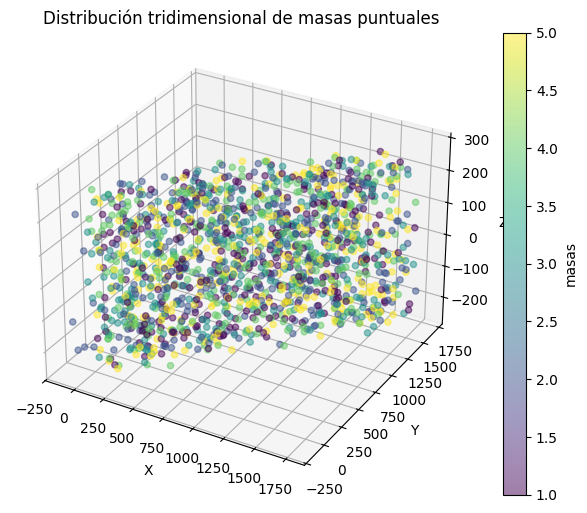

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(data=df, xs='x', ys='y', zs='z', c='masas', cmap='viridis', alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribución tridimensional de masas puntuales')
plt.colorbar(sc, label='masas')
plt.show()

In [12]:
eta0_3D = df['masas'].sum()
print(f'El tensor de inercia de orden cero es: ', eta0_3D)

El tensor de inercia de orden cero es:  4627.0


In [ ]:
xmed = (df['masas'] * df['x']).sum() / df['masas'].sum()
ymed = (df['masas'] * df['y']).sum() / df['masas'].sum()
zmed = (df['masas'] * df['z']).sum() / df['masas'].sum()

eta1x_3D = (df['masas'] * (df['x'] - xmed)).sum()
eta1y_3D = (df['masas'] * (df['y'] - ymed)).sum()
eta1z_3D = (df['masas'] * (df['y'] - ymed)).sum()

eta1 = np.round(np.array([eta1x, eta1y, eta1z_3D]), 10)

print(f'El tensor de inercia de orden uno es: ', eta1) 

El tensor de inercia de orden uno es:  [1.e-10 0.e+00 0.e+00]


In [24]:
Ixx = (df['masas'] * (df['x'] - xmed) * (df['x'] - xmed)).sum()
Ixy = (df['masas'] * (df['x'] - xmed) * (df['y'] - ymed)).sum()
Ixz = (df['masas'] * (df['x'] - xmed) * (df['z'] - zmed)).sum()
Iyy = (df['masas'] * (df['y'] - ymed) * (df['y'] - ymed)).sum()
Iyz = (df['masas'] * (df['y'] - ymed) * (df['z'] - zmed)).sum()
Izz = (df['masas'] * (df['z'] - zmed) * (df['z'] - zmed)).sum()

eta2 = np.array(([Ixx, Ixy, Ixz],
                 [Ixy, Iyy, Iyz],
                 [Ixz, Iyz, Izz]))

autval, autvec = np.linalg.eig(eta2)

autvec1 = np.array([autvec[0,0], autvec[0,1], autvec[0,2]]) # Primer autovector
autvec2 = np.array([autvec[1,0], autvec[1,1], autvec[1,2]]) # Segundo autovector
autvec3 = np.array([autvec[2,0], autvec[2,1], autvec[2,2]]) # Tercer autovector
rcm = np.array([xmed, ymed, zmed]) # Posición del centro de masa
xc = np.array([1,0,0]) # Vector unitario x
yc = np.array([0,1,0]) # Vector unitario y
zc = np.array([0,0,1]) # Vector unitario y
origen = np.array([0,0,0])

print(f'El tensor de inercia de segundo orden o la matriz de covarianza es:')
print(eta2)

El tensor de inercia de segundo orden o la matriz de covarianza es:
[[ 9.58535589e+08  9.11747911e+08 -7.14204864e+06]
 [ 9.11747911e+08  9.63660148e+08 -1.92959724e+06]
 [-7.14204864e+06 -1.92959724e+06  1.01843321e+08]]


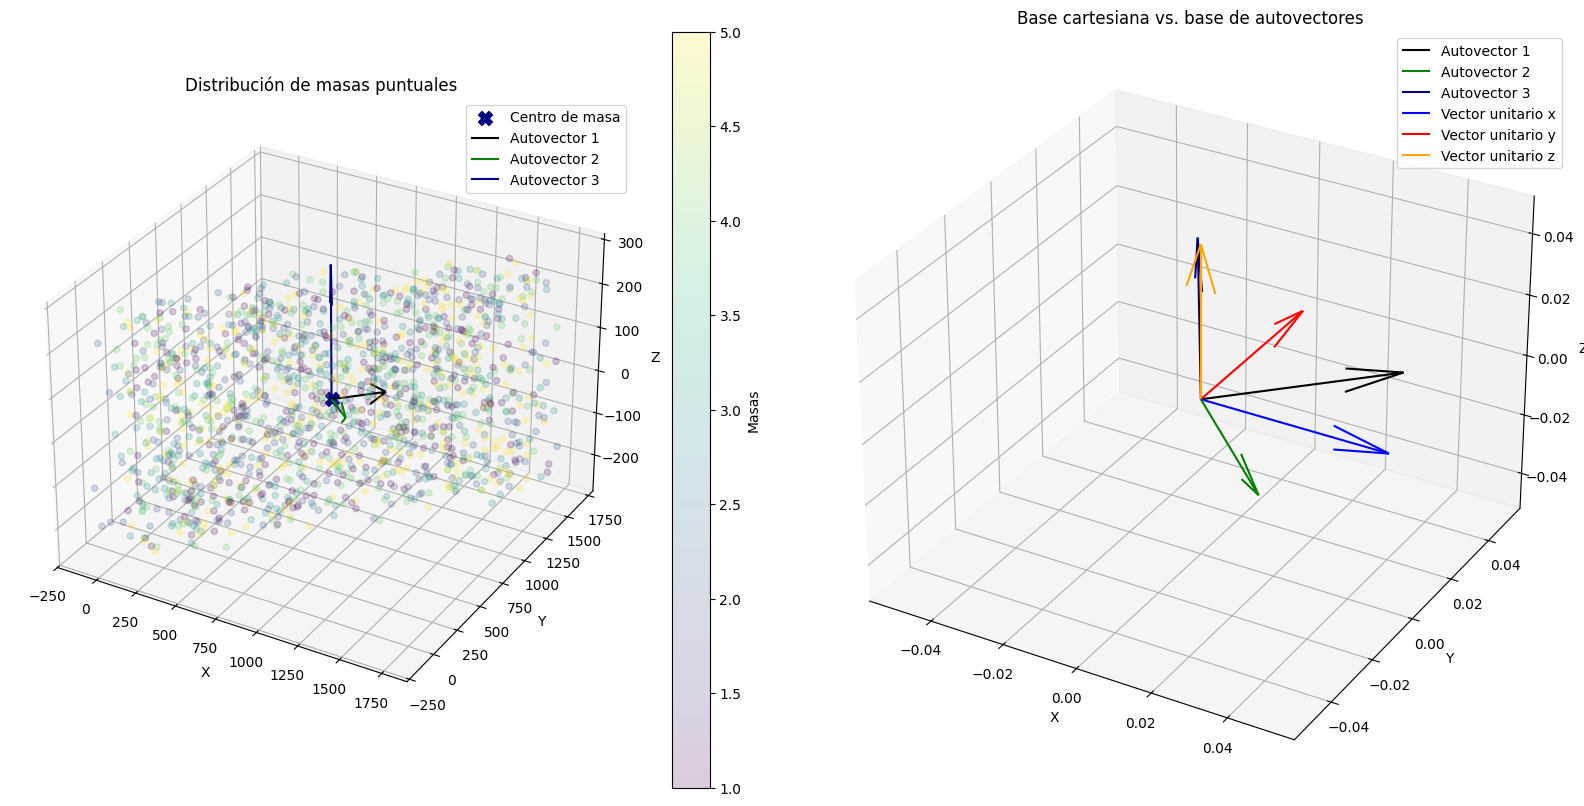

In [25]:
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
sc = ax1.scatter(df['x'], df['y'], df['z'], c=df['masas'], cmap='viridis', alpha=0.2)
ax1.scatter(*rcm, c='navy', s=100, marker='X', label='Centro de masa')

colors = ['k', 'g', 'navy']
for i in range(3):
    ax1.quiver(*rcm, *autvec[:, i]*300, color=colors[i], label=f'Autovector {i+1}')

ax1.set_title('Distribución de masas puntuales')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()
fig.colorbar(sc, ax=ax1, label='Masas')

ax2 = fig.add_subplot(122, projection='3d')

for i in range(3):
    ax2.quiver(*origen, *autvec[:, i]*0.05, color=colors[i], label=f'Autovector {i+1}')

ax2.quiver(*origen, *xc*0.05, color='b', label='Vector unitario x')
ax2.quiver(*origen, *yc*0.05, color='r', label='Vector unitario y')
ax2.quiver(*origen, *zc*0.05, color='orange', label='Vector unitario z')

ax2.set_title('Base cartesiana vs. base de autovectores')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

plt.tight_layout()
plt.show()

Vemos que los vectores propios 1 y 2 son rotaciones de los vectores x y y de la base cartesiana, el vector propio 3 mantiene la dirección del vector cartesiano z.

In [26]:
x_a_prop = np.dot(autvec, xc) # Transformación (Matriz autovec) del vector unitario x (vector xc) a la base propia da como resultado el primer vector propio
y_a_prop = np.dot(autvec, yc) # Transformación (Matriz autovec) del vector unitario y (vector yc) a la base propia da como resultado el segundo vector propio
z_a_prop = np.dot(autvec, zc) # Transformación (Matriz autovec) del vector unitario y (vector yc) a la base propia da como resultado el segundo vector propio

print(f'El vector cartesiano x es: ', xc, ' que transformado a base propia da: ', x_a_prop, ' que corresponde al primer vector propio ', autvec1)
print(f'El vector cartesiano y es: ', yc, ' que transformado a base propia da: ', y_a_prop, ' que corresponde al segundo vector propio ', autvec2)
print(f'El vector cartesiano y es: ', zc, ' que transformado a base propia da: ', z_a_prop, ' que corresponde al tercer vector propio ', autvec3)

print('La matriz de transformación de la base cartesiana a la base propia es: ')
print(autvec)
print('La matriz de transformación de la base propia a la base cartesiana es: ')
print(np.linalg.inv(autvec))

El vector cartesiano x es:  [1 0 0]  que transformado a base propia da:  [ 0.70611307  0.70808985 -0.00361904]  que corresponde al primer vector propio  [ 0.70611307  0.70654139 -0.04694255]
El vector cartesiano y es:  [0 1 0]  que transformado a base propia da:  [ 0.70654139 -0.7042117   0.06989384]  que corresponde al segundo vector propio  [ 0.70808985 -0.7042117   0.05190995]
El vector cartesiano y es:  [0 0 1]  que transformado a base propia da:  [-0.04694255  0.05190995  0.99754787]  que corresponde al tercer vector propio  [-0.00361904  0.06989384  0.99754787]
La matriz de transformación de la base cartesiana a la base propia es: 
[[ 0.70611307  0.70654139 -0.04694255]
 [ 0.70808985 -0.7042117   0.05190995]
 [-0.00361904  0.06989384  0.99754787]]
La matriz de transformación de la base propia a la base cartesiana es: 
[[ 0.70611307  0.70808985 -0.00361904]
 [ 0.70654139 -0.7042117   0.06989384]
 [-0.04694255  0.05190995  0.99754787]]
